In [1]:
from Portfolio import Portfolio, universe # universe is a global variable
# and each portfolio can access to the universe


In [2]:
import imp
from Admin import Admin, MeanReturn, MoneyWeightedReturn,SimpleReturn,TimeWeightedReturn,Volatility
import pandas as pd
# imp.reload(Admin)

In [3]:
universe.get_security('GAPSX').price

Unnamed: 0
2000-01-01          NaN
2000-01-02          NaN
2000-01-03     8.299891
2000-01-04     8.095037
2000-01-05     8.009132
2000-01-06     7.962875
2000-01-07     8.134686
2000-01-08     8.134686
2000-01-09     8.134686
2000-01-10     8.233809
2000-01-11     8.174335
2000-01-12     8.134686
2000-01-13     8.227203
2000-01-14     8.299891
2000-01-15     8.299891
2000-01-16     8.299891
2000-01-17     8.299891
2000-01-18     8.280067
2000-01-19     8.253634
2000-01-20     8.233809
2000-01-21     8.200769
2000-01-22     8.200769
2000-01-23     8.200769
2000-01-24     8.075214
2000-01-25     8.035563
2000-01-26     8.048779
2000-01-27     8.068607
2000-01-28     7.923225
2000-01-29     7.923225
2000-01-30     7.923225
                ...    
2019-05-03    18.740000
2019-05-04    18.740000
2019-05-05    18.740000
2019-05-06    18.590000
2019-05-07    18.270000
2019-05-08    18.250000
2019-05-09    18.150000
2019-05-10    18.240000
2019-05-11    18.240000
2019-05-12    18.240000
2019-

We are in a good state, target weights with short selling returned


([(0.127, 0.127)],
 [{'MRD.TO': 0.08055277379730139,
   'CIM.AX': -0.02936235501156823,
   'GAPSX': 1.118736940273682,
   'LNC': -0.3062284722180424,
   'KNEBV.HE': 0.13630111315862714}])

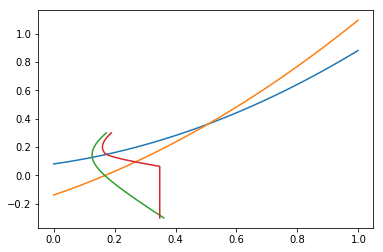

In [4]:
#Initialize admin
test_admin=Admin()
#
test_admin.suggestPortfolio('1','2014-04-01')

In [5]:
test_admin.acceptPortfolio(0)
test_admin.getAccountValue('2014-04-01')

199980.0019998

In [6]:
test_admin.trackPortfolio(rebalance_flag=True,rebalance_freq='3MS',rebal_start_date='2014-09-01')

In [7]:
test_admin.portfolio

{'2014-04-01': <Portfolio.Portfolio at 0x16527dc5b70>,
 '2014-09-01': <Portfolio.Portfolio at 0x16528f175c0>,
 '2014-12-01': <Portfolio.Portfolio at 0x165280ee080>,
 '2015-03-01': <Portfolio.Portfolio at 0x16528f0fac8>,
 '2015-06-01': <Portfolio.Portfolio at 0x165280d9cc0>,
 '2015-09-01': <Portfolio.Portfolio at 0x165280c4320>,
 '2015-12-01': <Portfolio.Portfolio at 0x165280d9160>,
 '2016-03-01': <Portfolio.Portfolio at 0x16528f0fc18>,
 '2016-06-01': <Portfolio.Portfolio at 0x165280e15c0>,
 '2016-09-01': <Portfolio.Portfolio at 0x165280eef60>,
 '2016-12-01': <Portfolio.Portfolio at 0x16528931b38>,
 '2017-03-01': <Portfolio.Portfolio at 0x16528931f60>,
 '2017-06-01': <Portfolio.Portfolio at 0x16528931940>,
 '2017-09-01': <Portfolio.Portfolio at 0x165280ee710>,
 '2017-12-01': <Portfolio.Portfolio at 0x16528931ba8>,
 '2018-03-01': <Portfolio.Portfolio at 0x165280d9048>,
 '2018-06-01': <Portfolio.Portfolio at 0x16528927860>,
 '2018-09-01': <Portfolio.Portfolio at 0x165280e1550>,
 '2018-12-

In [8]:
start_date='2014-04-01'
test_admin.getAccountValue(start_date)

199980.0019998

We are in a good state, target weights with short selling returned


199980.0019998

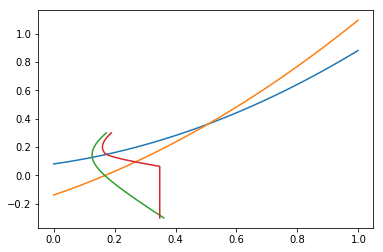

In [9]:
test_admin_norebal=Admin()
#
test_admin_norebal.suggestPortfolio('1',start_date)
test_admin_norebal.acceptPortfolio(0)
test_admin_norebal.trackPortfolio(rebalance_flag=False)
test_admin_norebal.getAccountValue(start_date)

In [10]:
from datetime import datetime
date_format='%Y-%m-%d'
today_date=test_admin.today
all_dates=[datetime.strftime(item,date_format) for item in pd.date_range(start_date,today_date,freq='M')]

In [11]:
portf_values=[]
portf_values_norebal=[]
for item in all_dates:
    portf_values.append(test_admin.getAccountValue(item))
    portf_values_norebal.append(test_admin_norebal.getAccountValue(item))
    

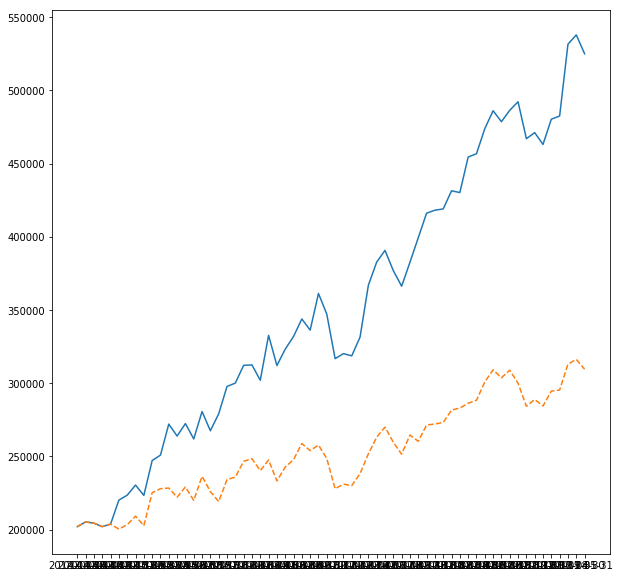

In [12]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(all_dates,portf_values)
plt.plot(all_dates,portf_values_norebal,'--')

In [13]:
print(MeanReturn(test_admin.portfolio,start_date,today_date))
print(SimpleReturn(test_admin.portfolio,start_date,today_date))
print(TimeWeightedReturn(test_admin.portfolio,test_admin.cash_transacs,start_date,today_date))
print(MoneyWeightedReturn(test_admin.portfolio,test_admin.cash_transacs,start_date,today_date))
print(Volatility(test_admin.portfolio,start_date,today_date))

0.17622779663769444
0.205257936417776
0.0807803826700122
0.3673078960748731
0.1417262629641859
